In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('height-weight.csv')

In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


<Axes: xlabel='Weight', ylabel='Height'>

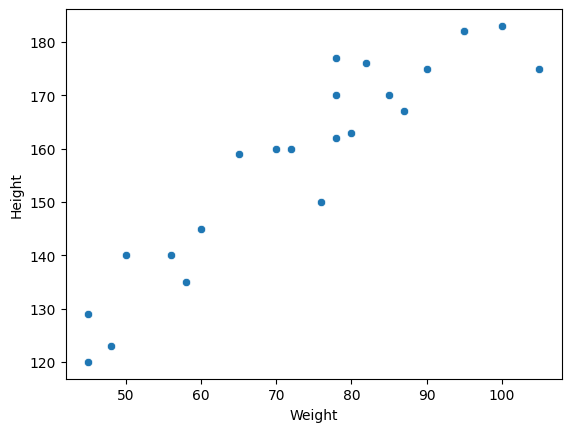

In [9]:
## Scatter Plot
sns.scatterplot(x='Weight', y='Height', data=df)

### We can classify this problem as Simple Linear Regression

<Axes: >

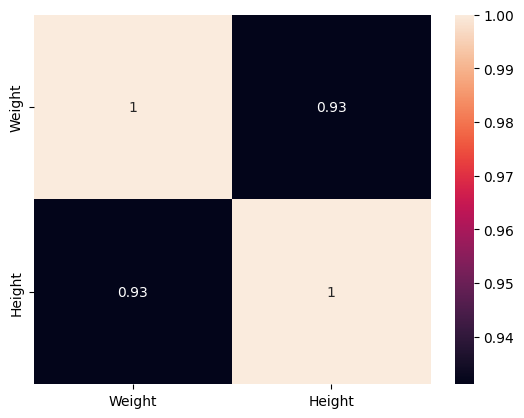

In [11]:
## Finding the correlation between weight and height
sns.heatmap(df.corr(), annot=True)

### Weight and Height are Highly Correlated

In [ ]:
## Independent and Dependent Features
# X = df['Weight']     X is a Series, np.array(X) is a 1-D array
# y = df['Height']     y is a Series, np.array(y) is a 1-D array

## X and y must be dataframe

X = df[['Weight']]      ## Independent feature should be dataframe or 2-D array,df[['Weight']] is a dataframe and np.array(X) is a 2-D array
y = df['Height']      ## Dependent feature can be a Series or 1-D array, df['Height'] is a Series, np.array(y) is a 1-D array
## X is a dataframe and y is a Series

In [ ]:
X.shape, y.shape  ## .shape method also works for Dataframe and Series

((23, 1), (23,))

(23, 1) :- 23 rows of 1 independent feature

In [ ]:
## Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  ## Randomly picking 25% data points and putting it in test dataset
## X_train, X_test, y_train, y_test are dataframes

In [ ]:
## Standardization :- We take each independent feature and find the Z-score for each datapoint
## We do not standardize the ouput feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
## fit_transform means that we apply mean and std-dev of X_train on the datapoints of X_train
## for X_test we use .transform() instead of .fit_transform()
## .transform uses the mean and std-dev of X_train on datapoints of X_test
X_test = scaler.transform(X_test)



In [17]:
## Apply Simple Linear Regression

from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [18]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
regression.coef_ ## Slope i.e. Theta1, Theta2, Theta3, ....

array([17.2982057])

In [20]:
regression.intercept_  ## intercept i.e. Theta0

np.float64(156.47058823529412)

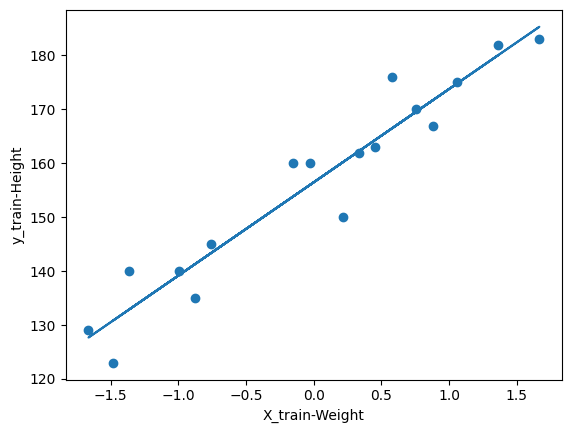

In [ ]:
## Plot the best fit line 

plt.scatter(X_train, y_train)
plt.xlabel('X_train-Weight')
plt.ylabel('y_train-Height')
plt.plot(X_train, regression.predict(X_train))

## regression.predict(X_train) returns the array of all the predictions for X_train

In [25]:
## Prediction for test data

y_pred = regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [26]:
## Performance Metric

from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, mae, rmse

(114.84069295228699, 9.66512588679501, np.float64(10.716374991212605))

In [27]:
## R Squared 

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.7360826717981276

In [29]:
## Adjusted R Squared

adjusted_r2_squared = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1] - 1)
adjusted_r2_squared


0.6701033397476595